In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy.optimize as op
from sklearn import preprocessing
from sklearn.model_selection import train_test_split

In [2]:
df = pd.read_csv('SVM_CANCER.csv')
df.head()

,ID,Clump,UnifSize,UnifShape,MargAdh,SingEpiSize,BareNuc,BlandChrom,NormNucl,Mit,Class
0,1000025,5,1,1,1,2,1,3,1,1,2
1,1002945,5,4,4,5,7,10,3,2,1,2
2,1015425,3,1,1,1,2,2,3,1,1,2
3,1016277,6,8,8,1,3,4,3,7,1,2
4,1017023,4,1,1,3,2,1,3,1,1,2


1     145
5     130
3     108
4      80
10     69
2      50
8      46
6      34
7      23
9      14
Name: Clump, dtype: int64


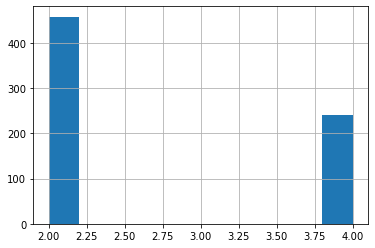

In [3]:
print(df.Clump.value_counts())
df.Class.hist();

### benign = 2; malignant = 4

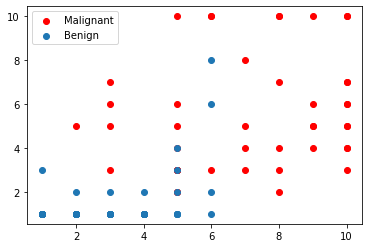

In [4]:
plt.scatter([df.Clump[i] for i in range(100) if df.Class[i] == 4],[df.UnifSize[i] for i in range(100) if df.Class[i] == 4], c = 'r', label='Malignant')
plt.scatter([df.Clump[i] for i in range(100) if df.Class[i] == 2],[df.UnifSize[i] for i in range(100) if df.Class[i] == 2], label = 'Benign')
plt.legend()

In [5]:
df.dtypes

ID              int64
Clump           int64
UnifSize        int64
UnifShape       int64
MargAdh         int64
SingEpiSize     int64
BareNuc        object
BlandChrom      int64
NormNucl        int64
Mit             int64
Class           int64
dtype: object

In [6]:
df = df[pd.to_numeric(df.BareNuc, errors='coerce').notnull()]
df['BareNuc'] = df['BareNuc'].astype('int')
df.dtypes

ID             int64
Clump          int64
UnifSize       int64
UnifShape      int64
MargAdh        int64
SingEpiSize    int64
BareNuc        int32
BlandChrom     int64
NormNucl       int64
Mit            int64
Class          int64
dtype: object

In [7]:
x = df[['Clump', 'UnifSize', 'UnifShape', 'MargAdh', 'SingEpiSize', 'BareNuc', 'BlandChrom', 'NormNucl', 'Mit']].values
x[0:5]

array([[ 5,  1,  1,  1,  2,  1,  3,  1,  1],
       [ 5,  4,  4,  5,  7, 10,  3,  2,  1],
       [ 3,  1,  1,  1,  2,  2,  3,  1,  1],
       [ 6,  8,  8,  1,  3,  4,  3,  7,  1],
       [ 4,  1,  1,  3,  2,  1,  3,  1,  1]], dtype=int64)

In [8]:
y = df.Class.values
y[0:5]

array([2, 2, 2, 2, 2], dtype=int64)

In [9]:
from sklearn.model_selection import train_test_split
xtrain, xtest, ytrain, ytest = train_test_split(x, y, test_size=0.2, random_state=4)

In [10]:
from sklearn import svm

clf = svm.SVC(kernel='rbf')
clf.fit(xtrain, ytrain)
yhat = clf.predict(xtest)

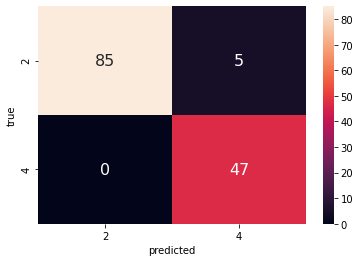

In [11]:
from sklearn.metrics import confusion_matrix, classification_report
df_cm = confusion_matrix(ytest, yhat)
import seaborn as sn
sn.heatmap(df_cm, xticklabels='24', yticklabels='24', annot=True, annot_kws={"size": 16})
plt.xlabel('predicted')
plt.ylabel('true')
plt.show()

In [13]:
print(classification_report(ytest, yhat))

              precision    recall  f1-score   support

           2       1.00      0.94      0.97        90
           4       0.90      1.00      0.95        47

    accuracy                           0.96       137
   macro avg       0.95      0.97      0.96       137
weighted avg       0.97      0.96      0.96       137

